# CONTROLE CONTINU DE MODULES PYTHON POUR L'IA

## ONFIANG KIRK BRADLEY - B3 JOUR

### Nettoyage du jeu de données

In [1]:
# Importation des libraires nécessaires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import  LabelEncoder, OneHotEncoder, label_binarize
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, cohen_kappa_score, matthews_corrcoef
import pickle

In [2]:
# Chargement du jeu de données
data = pd.read_csv("diamonds.csv")
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
# Suppression des colonnes non nécessaires (par exemple, index)
data.drop(columns=['Unnamed: 0'], inplace=True)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
data.value_counts()

carat  cut      color  clarity  depth  table  price  x      y      z   
0.79   Ideal    G      SI1      62.3   57.0   2898   5.90   5.85   3.66    5
0.50   Premium  D      SI2      62.9   58.0   997    5.06   5.01   3.17    2
1.20   Premium  I      VS2      62.6   58.0   5699   6.77   6.72   4.22    2
0.52   Ideal    D      VS2      61.8   55.0   1822   5.16   5.19   3.20    2
0.41   Ideal    G      IF       61.7   56.0   1367   4.77   4.80   2.95    2
                                                                          ..
0.50   Ideal    E      VS1      61.9   56.0   1716   5.09   5.12   3.16    1
                                62.0   58.0   1755   5.09   5.14   3.17    1
                                62.2   54.0   1665   5.10   5.13   3.18    1
                                       56.0   1619   5.10   5.13   3.18    1
5.01   Fair     J      I1       65.5   59.0   18018  10.74  10.54  6.98    1
Name: count, Length: 53794, dtype: int64

In [5]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [6]:
# Check des valeurs manquantes
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<Axes: >

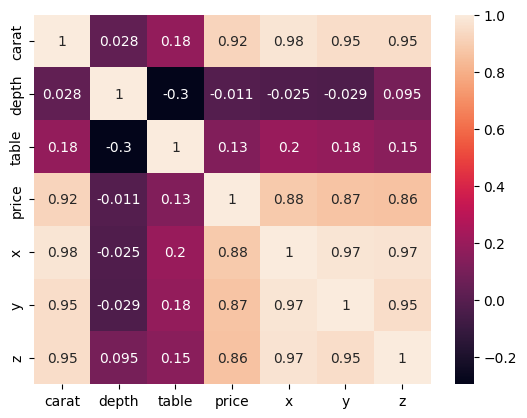

In [7]:
sns.heatmap(data.select_dtypes(include=["int64", "float64"]).corr(), annot=True)

C:\Users\SANTI\AppData\Local\Temp\ipykernel_11964\4162361693.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="color", y="price", data=data, palette='viridis')


<Axes: xlabel='color', ylabel='price'>

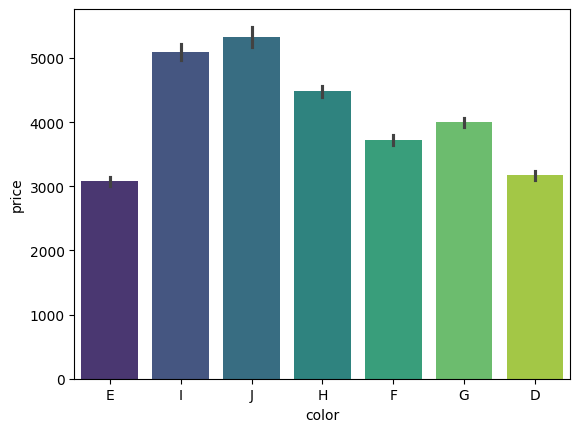

In [8]:
sns.barplot(x="color", y="price", data=data, palette='viridis')

In [9]:
# Sauvegarde du dataset nettoyé
data.to_csv("diamonds_clean.csv", index=False)

### Création du modèle de Machine Learning

In [10]:
# Fonction d'encodage par fréquence pour les colonnes non cibles
def encodage(colonne, new_colonne):
    fe = data.groupby(colonne).size() / len(data)
    data.loc[:, new_colonne] = data[colonne].map(fe.round(6))
    data.drop(colonne, axis=1, inplace=True)

# Appliquer l'encodage de fréquence pour les variables indépendantes
encodage("color", "new_color")
encodage("clarity", "new_clarity")

# Pour la cible cut, utilisation de LabelEncoder 
label_encoder = LabelEncoder()
data["new_cut"] = label_encoder.fit_transform(data["cut"])

data.drop("cut", axis=1, inplace=True)

# Vérifier le résultat
data.head()

,carat,depth,table,price,x,y,z,new_color,new_clarity,new_cut
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.181628,0.170449,2
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.181628,0.242214,3
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0.181628,0.151483,1
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.100519,0.227253,3
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0.052058,0.170449,1


In [11]:
X = data.drop(columns=["new_cut"])
y = data["new_cut"]

In [12]:
X

,carat,depth,table,price,x,y,z,new_color,new_clarity
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.181628,0.170449
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.181628,0.242214
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0.181628,0.151483
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.100519,0.227253
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0.052058,0.170449
...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0.125603,0.242214
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0.125603,0.242214
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0.125603,0.242214
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0.153949,0.170449


In [13]:
y

0        2
1        3
2        1
3        3
4        1
        ..
53935    2
53936    1
53937    4
53938    3
53939    2
Name: new_cut, Length: 53940, dtype: int32

In [14]:
# Séparation du jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Création du modèle de Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

In [16]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10]
    }

grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [17]:
# Meilleurs paramètres et scores
print(f'Neilleurs paramètres: {grid_search.best_params_}')

Neilleurs paramètres: {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [18]:
dt_model = DecisionTreeClassifier(max_depth=None, min_samples_leaf=10, min_samples_split=2)

In [19]:
# Entraînement du modèle Decision Tree
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10)

In [20]:
# Prédiction avec le modèle Decision Tree
y_pred_dt = dt_model.predict(X_test)
y_pred_dt

array([2, 3, 2, ..., 4, 2, 1])

In [ ]:
# Évaluation du modèle Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt

0.7594549499443827

In [22]:
# Binarisation pour AUC multiclass
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Initialisation d'un tableau pour stocker les résultats
results = []

y_pred = dt_model.predict(X_test)
y_proba = dt_model.predict_proba(X_test)


# Prédiction avec le meilleur modèle optimisé
# Calcul des métriques avec la création d'un dictionnaire
metrics = {
        "Modèle": dt_model,
        "Meilleurs paramètres": grid_search.best_params_,
        "Accuracy": accuracy_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test_bin, y_proba, multi_class='ovr'),
        "Recall": recall_score(y_test, y_pred, average='macro'),
        "Precision": precision_score(y_test, y_pred, average='macro'),
        "F1-score": f1_score(y_test, y_pred, average='macro'),
        "Kappa": cohen_kappa_score(y_test, y_pred),
        "MCC": matthews_corrcoef(y_test, y_pred)
    }

# Affichage des résultats
metrics


{'Modèle': DecisionTreeClassifier(min_samples_leaf=10),
 'Meilleurs paramètres': {'max_depth': None,
  'min_samples_leaf': 10,
  'min_samples_split': 2},
 'Accuracy': 0.7594549499443827,
 'AUC': 0.9113560207447096,
 'Recall': 0.7535706841825311,
 'Precision': 0.7659616943840961,
 'F1-score': 0.7589807204450569,
 'Kappa': 0.6615898237816448,
 'MCC': 0.6624187694178074}

In [23]:
# Sauvegarde du modèle avec pickle
import pickle
pickle.dump(dt_model, open('model_diamonds.pkl', 'wb'))